In [1]:
import sys
sys.path.insert(0, '../Results')
sys.path.insert(0, '../../src')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
from visualization_utils import perc, SetPlotRC, ApplyFont

In [2]:
if not os.path.exists("Figures"):
    os.mkdir("Figures")

# Simplex Mixing Scenario

In [3]:
df_simplex_results = pd.read_pickle(r"../Results/simulation_results_simplex_mixing_distributionV1.pkl")
# df_simplex_results

In [4]:
results = df_simplex_results[['Model', 'mixing_dist', 'SINR']].groupby(['Model', 'mixing_dist']).agg({'mixing_dist':'size', 'SINR':'mean'}).rename(columns={'mixing_dist':'count','SINR':'SINR'}).reset_index()
# results

table = pd.DataFrame(columns = (["mixing_dist"] + list(df_simplex_results['Model'].unique())))
table['mixing_dist'] = list(results['mixing_dist'].unique())
for m in list(table.columns[1:]):
    table[m] = results.loc[results['Model'] == m]['SINR'].values
    
table

,mixing_dist,CorInfoMax,LDMI
0,laplace,24.704708,30.817942
1,normal,25.236073,31.087195
2,uniform,25.585450,31.000608
3,uniform2,25.073613,30.896235


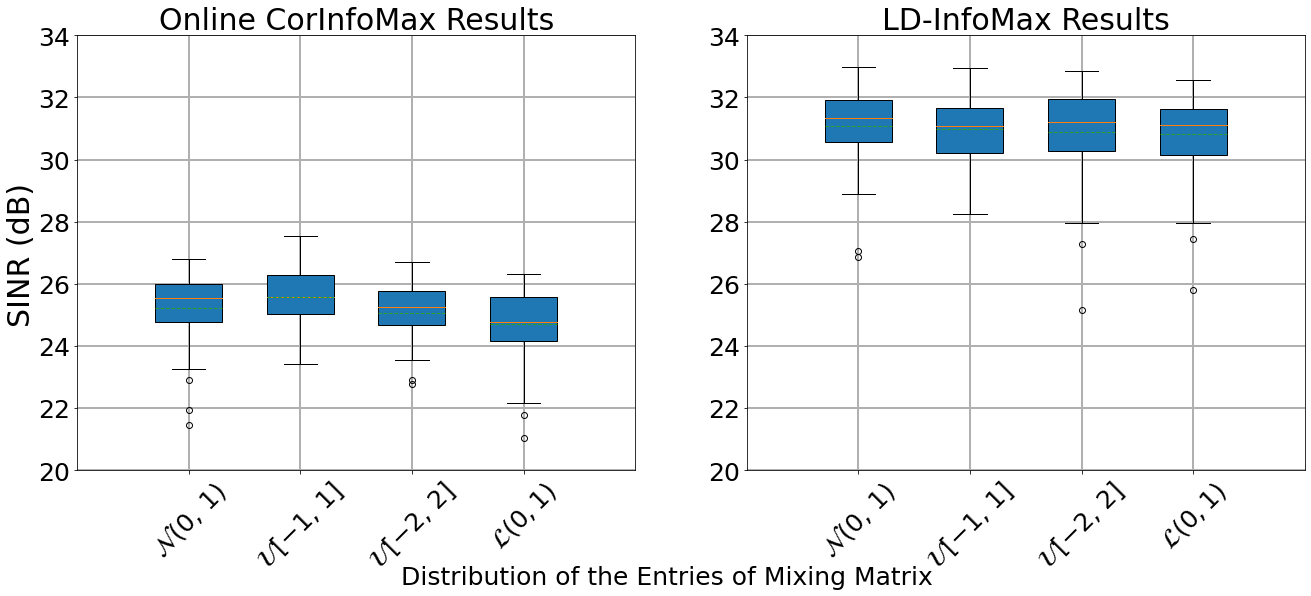

In [13]:
xticks_fontsize = 25
yticks_fontsize = 25
xlabel_fontsize = 25
ylabel_fontisize = 30
title_fontsize = 30
suptitle_fontsize = 30

CorInfoMaxSINRResults = []
LDMISINRResults = []
for dist in ['normal', "uniform", "uniform2", "laplace"]:
    CorInfoMaxSINRResults.append(df_simplex_results.loc[(df_simplex_results['Model'] == "CorInfoMax") & (df_simplex_results['mixing_dist'] == dist)]['SINR'].values)
    LDMISINRResults.append(df_simplex_results.loc[(df_simplex_results['Model'] == "LDMI") & (df_simplex_results['mixing_dist'] == dist)]['SINR'].values)

fig = plt.figure(figsize = (22,8))
plt.subplot(1,2, 1)
plt.boxplot(CorInfoMaxSINRResults, meanline = True, showmeans = True, widths = 0.6, patch_artist = True)
plt.xticks([1, 2, 3, 4], [r'$\mathcal{N}(0,\,1)$', r'$\mathcal{U}[-1,\,1]$', r'$\mathcal{U}[-2,\,2]$', r'$\mathcal{L}(0 ,1)$'])
plt.grid(linewidth=2)
plt.xticks(rotation = (45),fontsize=xticks_fontsize)
plt.yticks(fontsize=yticks_fontsize)
# plt.ylabel('SINR (dB)',fontsize=25)
# plt.xlabel(r"Distribution of the Entries of Mixing Matrix ",fontsize=25)
plt.title("Online CorInfoMax Results",fontsize=title_fontsize)
plt.axis([0.0,5,20,34])

# plt.figure(figsize = (12,7))
plt.subplot(1,2, 2)
plt.boxplot(LDMISINRResults, meanline = True, showmeans = True, 
            widths = 0.6, patch_artist = True)
plt.xticks([1, 2, 3, 4], [r'$\mathcal{N}(0,\,1)$', r'$\mathcal{U}[-1,\,1]$', r'$\mathcal{U}[-2,\,2]$', r'$\mathcal{L}(0 ,1)$'])
plt.grid(linewidth=2)
plt.xticks(rotation = (45),fontsize=xticks_fontsize)
plt.yticks(fontsize=yticks_fontsize)
# plt.ylabel('SINR (dB)',fontsize=25)
# plt.xlabel(r"Distribution of the Entries of Mixing Matrix ",fontsize=25)
plt.title("LD-InfoMax Results",fontsize=title_fontsize)
plt.axis([0.0,5,20,34])
fig.text(0.5, -0.06, "Distribution of the Entries of Mixing Matrix ", ha='center', va='center',fontsize=xlabel_fontsize)
fig.text(0.09, 0.5, 'SINR (dB)', ha='center', va='center', rotation='vertical', fontsize=ylabel_fontisize)

# fig.suptitle("Simplex Source Separation Results", fontsize = suptitle_fontsize)
plt.plot()

plt.savefig('Figures/CorInfoMaxSimplex_MixingDistribution.pdf', format='pdf', bbox_inches = 'tight')

# Simplex Noisy

In [3]:
df_simplex_results = pd.read_pickle(r"../Results/simulation_results_simplex_noisyV1.pkl")
# df_simplex_results

In [4]:
results = df_simplex_results[['Model', 'SNRlevel', 'SINR']].groupby(['Model', 'SNRlevel']).agg({'SNRlevel':'size', 'SINR':'mean'}).rename(columns={'SNRlevel':'count','SINR':'SINR'}).reset_index()
# results

table = pd.DataFrame(columns = (["SNRlevel"] + list(df_simplex_results['Model'].unique())))
table['SNRlevel'] = list(results['SNRlevel'].unique())
for m in list(table.columns[1:]):
    table[m] = results.loc[results['Model'] == m]['SINR'].values
    
table = table.iloc[::-1]
table

,SNRlevel,CorInfoMax,LDMI
4,30,25.007563,30.942486
3,25,21.353160,25.660944
2,20,17.168238,21.125244
1,15,12.320006,16.590291
0,10,7.746747,12.513439


findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


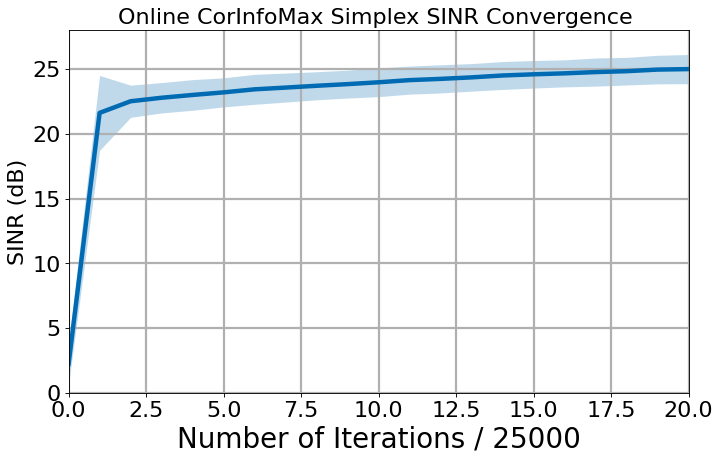

In [8]:
data = np.stack(df_simplex_results.loc[(df_simplex_results['SNRlevel'] == 30) & (df_simplex_results['Model'] == "CorInfoMax")]['SINRlist'].apply(lambda row: np.array(row)).to_numpy(), axis = 0)

# compute the medians and 25/75 percentiles
med, perc_25, perc_75, std_data = perc(data)

x = np.arange(0, med.shape[0])
fh2=plt.figure(figsize=(10, 6), dpi=80)
plt.plot(x, med, linewidth=4, color='#006BB2')
plt.fill_between(x, med + std_data, med - std_data, alpha=0.25, linewidth=0, color='#006BB2')


gh=plt.grid(linewidth=2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('SINR (dB)',fontsize=25)
plt.xlabel(r"Number of Iterations / 25000",fontsize=25)
plt.title("Online CorInfoMax Simplex SINR Convergence ")
plt.axis([0.0,20.0,-0,28])
ApplyFont(plt.gca())

plt.savefig('Figures/CorInfoMaxSimplex_convergence30dBSNR.pdf', format='pdf')

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


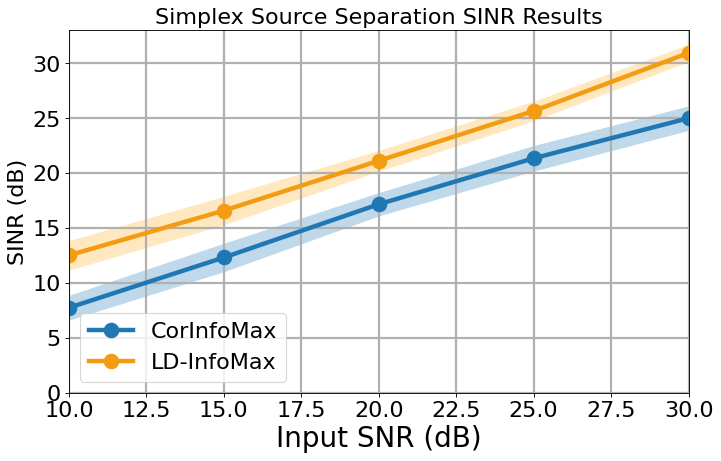

In [5]:
df_simplex_results = df_simplex_results.iloc[:df_simplex_results.shape[0] - np.mod(df_simplex_results.shape[0], 10)]
results = df_simplex_results[['Model', 'SNRlevel', 'SINR']].groupby(['Model', 'SNRlevel']).agg({'SNRlevel':'size', 'SINR':'mean'}).rename(columns={'SNRlevel':'count','SINR':'SINR'}).reset_index()

SINRCorInfoMax = (results.loc[(results['Model'] == 'CorInfoMax')]['SINR'].to_numpy())
SINRLDMI = (results.loc[(results['Model'] == 'LDMI')]['SINR'].to_numpy())
SNRinp = (np.array([10, 15, 20, 25, 30]))

dataCorInfo = df_simplex_results.loc[(df_simplex_results['Model'] == 'CorInfoMax')]['SINR'].to_numpy().reshape(df_simplex_results.shape[0]//(10),-1)
dataLDMI = df_simplex_results.loc[(df_simplex_results['Model'] == 'LDMI')]['SINR'].to_numpy().reshape(df_simplex_results.shape[0]//(10),-1)

medCorInfo, perc_25CorInfo, perc_75CorInfo, stdCorInfoMax = perc(dataCorInfo)
# perc_25CorInfo = np.flipud(perc_25CorInfo)
# perc_75CorInfo = np.flipud(perc_75CorInfo)

medLDMI, perc_25LDMI, perc_75LDMI, stdLDMI = perc(dataLDMI)
# perc_25LDMI= np.flipud(perc_25LDMI)
# perc_75LDMI = np.flipud(perc_75LDMI)

fh2=plt.figure(figsize=(10, 6), dpi=80)

plt.plot(SNRinp,SINRCorInfoMax,"-o", linewidth=4, markersize = 13, label = "CorInfoMax")
plt.fill_between(SNRinp, SINRCorInfoMax + stdCorInfoMax, SINRCorInfoMax - stdCorInfoMax, alpha=0.25, linewidth=0, color='#006BB2')

plt.plot(SNRinp,SINRLDMI,"-o", linewidth=4, markersize = 13, label = 'LD-InfoMax', color='#F39C12')
plt.fill_between(SNRinp, SINRLDMI + stdLDMI, SINRLDMI - stdLDMI, alpha=0.25, linewidth=0, color='orange')


gh=plt.grid(linewidth=2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('SINR (dB)',fontsize=25)
plt.xlabel(r"Input SNR (dB)",fontsize=25)
plt.axis([9.99,30,-0,33])
plt.legend(loc='lower left',fontsize=20)
plt.title('Simplex Source Separation SINR Results',fontsize=20)
ApplyFont(plt.gca())

plt.savefig('Figures/CorInfoMaxSimplex_ComparisonNoisy.pdf', format='pdf')

# General Polytope 3 Dimensional

In [10]:
# df_general_poly3dim_results = pd.read_pickle(r"../Results/simulation_results_general_polytope_3dimV1.pkl")
# # df_general_poly3dim_results

In [3]:
# df_general_poly3dim_results = pd.read_pickle(r"../Results/simulation_results_general_polytope_3dimV2.pkl")
# df_general_poly3dim_results

In [4]:
# df_general_poly3dim_results.iloc[-1:]

,trial,seed,Model,SINR,SINRlist,SNR,S,A,X,Wf,SNRinp,execution_time
278,92,697997652,PMF,31.32023,"[4.640520961193315, 31.371304352653343]","[31.987880141403725, 30.974550049820717, 30.89...",None,None,None,"[[0.20363162342544042, -0.1977414883497192, 0....",None,74.195136


In [18]:
# k = 7
# df_general_poly3dim_results.loc[df_general_poly3dim_results['Model'] == "CorInfoMax"]['SINR'].iloc[k+0:k+10]#.hist()

21    27.702879
24    28.459887
27    10.614373
30    29.207233
33    10.691434
36    28.566627
39    30.096098
42    28.369212
45    23.626793
48    29.891698
Name: SINR, dtype: float64

In [7]:
# results = df_general_poly3dim_results[['Model', 'SINR']].groupby(['Model']).agg({ 'SINR':'mean'}).rename(columns={'SINR':'SINR'}).reset_index()
# results

,Model,SINR
0,CorInfoMax,22.849011
1,LDMI,30.113703
2,PMF,26.110226


findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


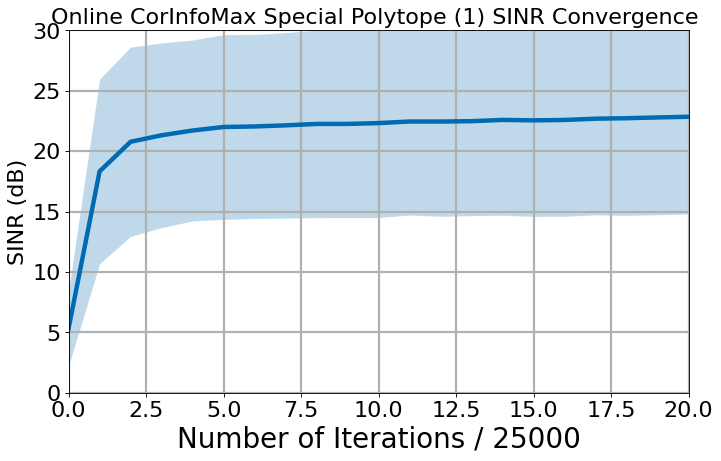

In [8]:
# data = np.stack(df_general_poly3dim_results.loc[ (df_general_poly3dim_results['Model'] == "CorInfoMax")]['SINRlist'].apply(lambda row: np.array(row)).to_numpy(), axis = 0)

# # compute the medians and 25/75 percentiles
# med, perc_25, perc_75, std_data = perc(data)

# x = np.arange(0, med.shape[0])
# fh2=plt.figure(figsize=(10, 6), dpi=80)
# plt.plot(x, med, linewidth=4, color='#006BB2')
# plt.fill_between(x, med + std_data, med - std_data, alpha=0.25, linewidth=0, color='#006BB2')


# gh=plt.grid(linewidth=2)
# plt.xticks(fontsize=20)
# plt.yticks(fontsize=20)
# plt.ylabel('SINR (dB)',fontsize=25)
# plt.xlabel(r"Number of Iterations / 25000",fontsize=25)
# plt.title("Online CorInfoMax Special Polytope (1) SINR Convergence ")
# plt.axis([0.0,20.0,-0,30])
# ApplyFont(plt.gca())

(93, 13)


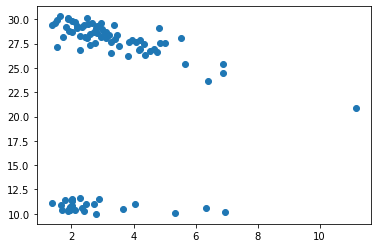

In [20]:
# df = df_general_poly3dim_results.loc[df_general_poly3dim_results['Model'] == 'CorInfoMax'].copy()
# df['cond'] = df.apply(lambda row: np.linalg.cond(row['A']), axis = 1)
# # df = df.loc[(df['cond'] < 3)]
# print(df.shape)
# plt.scatter(df['cond'], df['SINR'])

In [56]:
# from bss_utils import *
# k = 2
# print(df_general_poly3dim_results.loc[df_general_poly3dim_results['Model'] == "CorInfoMax"]['SINRlist'].iloc[k][-1])
# print(df_general_poly3dim_results.loc[df_general_poly3dim_results['Model'] == "CorInfoMax"]['SINR'].iloc[k])
# WfCorInfoMax = df_general_poly3dim_results.loc[df_general_poly3dim_results['Model'] == "CorInfoMax"]['Wf'].iloc[k]
# X = df_general_poly3dim_results.loc[df_general_poly3dim_results['Model'] == "CorInfoMax"]['X'].iloc[k]
# A = df_general_poly3dim_results.loc[df_general_poly3dim_results['Model'] == "CorInfoMax"]['A'].iloc[k]
# S = df_general_poly3dim_results.loc[df_general_poly3dim_results['Model'] == "CorInfoMax"]['S'].iloc[k]

# YCorInfoMax = WfCorInfoMax @ X
# SINRCorInfoMax, SNRCorInfoMax, _, _, _ = evaluate_bss(WfCorInfoMax, YCorInfoMax, A, S, mean_normalize_estimations = False)
# SINRCorInfoMax

43.638393946902156
25.986575002740793


25.986575002740796

In [79]:
# df_general_poly3dim_results = pd.read_pickle(r"../Results/simulation_results_general_polytope_3dimV3.pkl")
# # df_general_poly3dim_results

In [80]:
# results = df_general_poly3dim_results[['Model', 'SINR']].groupby(['Model']).agg({ 'SINR':'mean'}).rename(columns={'SINR':'SINR'}).reset_index()
# results

,Model,SINR
0,CorInfoMax,28.158518
1,LDMI,39.537317
2,PMF,37.293112


<AxesSubplot:>

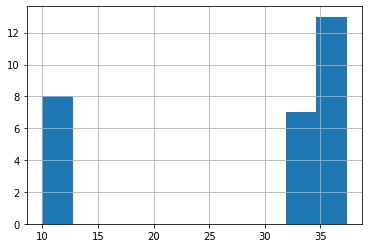

In [82]:
# df_general_poly3dim_results.loc[df_general_poly3dim_results['Model'] == "CorInfoMax"]['SINR'].hist()

In [83]:
# df_general_poly3dim_results.shape

(84, 12)

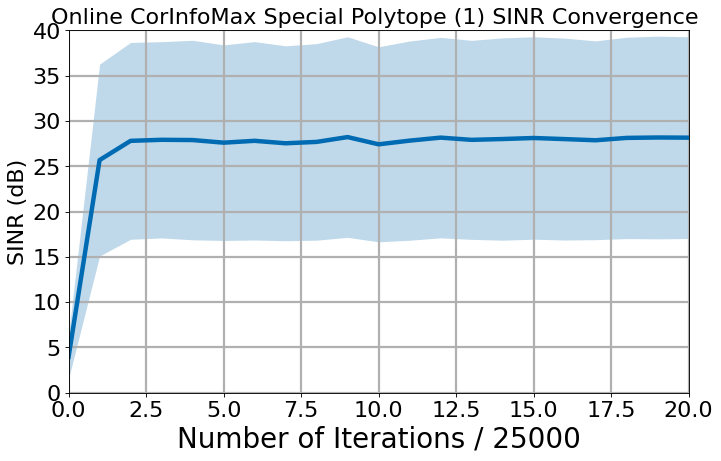

In [84]:
# data = np.stack(df_general_poly3dim_results.loc[ (df_general_poly3dim_results['Model'] == "CorInfoMax")]['SINRlist'].apply(lambda row: np.array(row)).to_numpy(), axis = 0)

# # compute the medians and 25/75 percentiles
# med, perc_25, perc_75, std_data = perc(data)

# x = np.arange(0, med.shape[0])
# fh2=plt.figure(figsize=(10, 6), dpi=80)
# plt.plot(x, med, linewidth=4, color='#006BB2')
# plt.fill_between(x, med + std_data, med - std_data, alpha=0.25, linewidth=0, color='#006BB2')


# gh=plt.grid(linewidth=2)
# plt.xticks(fontsize=20)
# plt.yticks(fontsize=20)
# plt.ylabel('SINR (dB)',fontsize=25)
# plt.xlabel(r"Number of Iterations / 25000",fontsize=25)
# plt.title("Online CorInfoMax Special Polytope (1) SINR Convergence ")
# plt.axis([0.0,20.0,-0,40])
# ApplyFont(plt.gca())

# General Polytope 5 Dimensional

In [4]:
# df_general_poly5dim_results = pd.read_pickle(r"../Results/simulation_results_general_polytope_5dimV1.pkl")
# # df_general_poly5dim_results

In [63]:
# from bss_utils import *
# k = 2
# print(df_general_poly5dim_results.loc[df_general_poly5dim_results['Model'] == "CorInfoMax"]['SINRlist'].iloc[k][-1])
# print(df_general_poly5dim_results.loc[df_general_poly5dim_results['Model'] == "CorInfoMax"]['SINR'].iloc[k])
# WfCorInfoMax = df_general_poly5dim_results.loc[df_general_poly5dim_results['Model'] == "CorInfoMax"]['Wf'].iloc[k]
# X = df_general_poly5dim_results.loc[df_general_poly5dim_results['Model'] == "CorInfoMax"]['X'].iloc[k]
# A = df_general_poly5dim_results.loc[df_general_poly5dim_results['Model'] == "CorInfoMax"]['A'].iloc[k]
# S = df_general_poly5dim_results.loc[df_general_poly5dim_results['Model'] == "CorInfoMax"]['S'].iloc[k]

# YCorInfoMax = WfCorInfoMax @ X
# SINRCorInfoMax, SNRCorInfoMax, _, _, _ = evaluate_bss(WfCorInfoMax, YCorInfoMax, A, S, mean_normalize_estimations = False)
# SINRCorInfoMax

26.339016823676047
26.339016823676047


26.339016823676047

<AxesSubplot:>

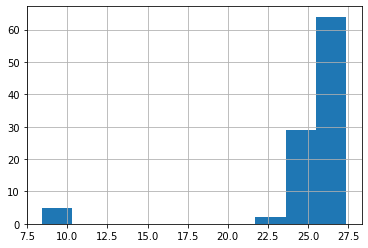

In [76]:
# df_general_poly5dim_results.loc[df_general_poly5dim_results['Model'] == "CorInfoMax"]['SINR'].hist()

In [16]:
# results = df_general_poly5dim_results[['Model', 'SINR']].groupby(['Model']).agg({ 'SINR':'mean'}).rename(columns={'SINR':'SINR'}).reset_index()
# results

,Model,SINR
0,CorInfoMax,24.952910
1,CorInfoMax2,26.459609
2,LDMI,30.235116
3,PMF,27.334741


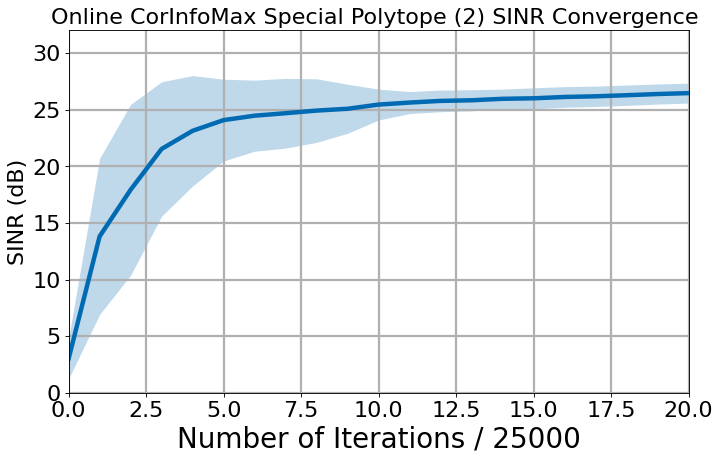

In [17]:
# data = np.stack(df_general_poly5dim_results.loc[ (df_general_poly5dim_results['Model'] == "CorInfoMax2")]['SINRlist'].apply(lambda row: np.array(row)).to_numpy(), axis = 0)

# # compute the medians and 25/75 percentiles
# med, perc_25, perc_75, std_data = perc(data)

# x = np.arange(0, med.shape[0])
# fh2=plt.figure(figsize=(10, 6), dpi=80)
# plt.plot(x, med, linewidth=4, color='#006BB2')
# plt.fill_between(x, med + std_data, med - std_data, alpha=0.25, linewidth=0, color='#006BB2')


# gh=plt.grid(linewidth=2)
# plt.xticks(fontsize=20)
# plt.yticks(fontsize=20)
# plt.ylabel('SINR (dB)',fontsize=25)
# plt.xlabel(r"Number of Iterations / 25000",fontsize=25)
# plt.title("Online CorInfoMax Special Polytope (2) SINR Convergence ")
# plt.axis([0.0,20.0,-0,32])
# ApplyFont(plt.gca())

# plt.savefig('Figures/CorInfoMax_5dimGeneralPolytope_Convergence.pdf', format='pdf')

#  General Polytope 5 Dimensional Canonical

In [9]:
# df_general_poly5dim_results = pd.read_pickle(r"../Results/simulation_results_general_polytope_5dim_CanonicalV1.pkl")
# print(df_general_poly5dim_results.shape)
# results = df_general_poly5dim_results[['Model', 'SINR']].groupby(['Model']).agg({ 'SINR':'mean'}).rename(columns={'SINR':'SINR'}).reset_index()
# results

(172, 12)


,Model,SINR
0,CorInfoMax,27.465090
1,CorInfoMaxCanonical,21.898767


In [6]:
# df_general_poly5dim_results = pd.read_pickle(r"../Results/simulation_results_general_polytope_5dim_CanonicalV2.pkl")
# print(df_general_poly5dim_results.shape)
# df_general_poly5dim_results =df_general_poly5dim_results.loc[df_general_poly5dim_results['SINR'] != -999]
# results = df_general_poly5dim_results[['Model', 'SINR']].groupby(['Model']).agg({ 'SINR':'mean'}).rename(columns={'SINR':'SINR'}).reset_index()
# results

(200, 12)


,Model,SINR
0,CorInfoMax,27.331897
1,CorInfoMaxCanonical,24.484459


In [5]:
# df_general_poly5dim_results.loc[df_general_poly5dim_results['SINR'] == -999]

,trial,seed,Model,SINR,SINRlist,SNR,S,A,X,Wf,SNRinp,execution_time
101,50,1056166650,CorInfoMaxCanonical,-999.0,SVD did not converge,None,None,None,None,None,None,None


findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


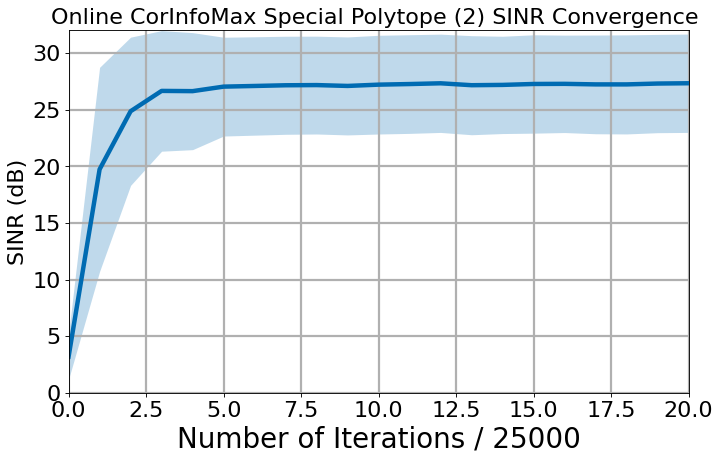

In [7]:
# data = np.stack(df_general_poly5dim_results.loc[ (df_general_poly5dim_results['Model'] == "CorInfoMax")]['SINRlist'].apply(lambda row: np.array(row)).to_numpy(), axis = 0)

# # compute the medians and 25/75 percentiles
# med, perc_25, perc_75, std_data = perc(data)

# x = np.arange(0, med.shape[0])
# fh2=plt.figure(figsize=(10, 6), dpi=80)
# plt.plot(x, med, linewidth=4, color='#006BB2')
# plt.fill_between(x, med + std_data, med - std_data, alpha=0.25, linewidth=0, color='#006BB2')


# gh=plt.grid(linewidth=2)
# plt.xticks(fontsize=20)
# plt.yticks(fontsize=20)
# plt.ylabel('SINR (dB)',fontsize=25)
# plt.xlabel(r"Number of Iterations / 25000",fontsize=25)
# plt.title("Online CorInfoMax Special Polytope (2) SINR Convergence ")
# plt.axis([0.0,20.0,-0,32])
# ApplyFont(plt.gca())


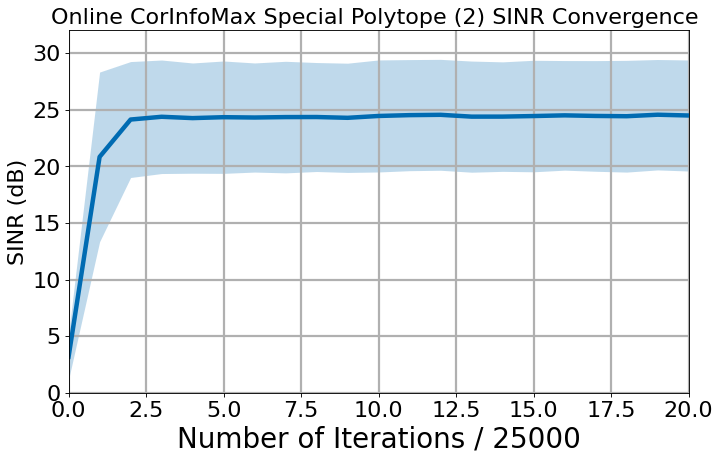

In [8]:
# data = np.stack(df_general_poly5dim_results.loc[ (df_general_poly5dim_results['Model'] == "CorInfoMaxCanonical")]['SINRlist'].apply(lambda row: np.array(row)).to_numpy(), axis = 0)

# # compute the medians and 25/75 percentiles
# med, perc_25, perc_75, std_data = perc(data)

# x = np.arange(0, med.shape[0])
# fh2=plt.figure(figsize=(10, 6), dpi=80)
# plt.plot(x, med, linewidth=4, color='#006BB2')
# plt.fill_between(x, med + std_data, med - std_data, alpha=0.25, linewidth=0, color='#006BB2')


# gh=plt.grid(linewidth=2)
# plt.xticks(fontsize=20)
# plt.yticks(fontsize=20)
# plt.ylabel('SINR (dB)',fontsize=25)
# plt.xlabel(r"Number of Iterations / 25000",fontsize=25)
# plt.title("Online CorInfoMax Special Polytope (2) SINR Convergence ")
# plt.axis([0.0,20.0,-0,32])
# ApplyFont(plt.gca())


<AxesSubplot:>

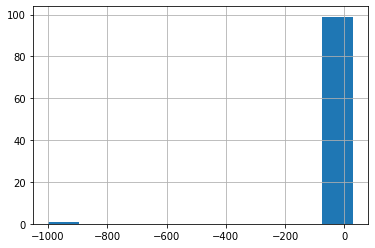

In [4]:
# df_general_poly5dim_results.loc[ (df_general_poly5dim_results['Model'] == "CorInfoMaxCanonical")]['SINR'].hist()

# General Polytope 6 Dimensional

In [18]:
# df_general_poly6dim_results = pd.read_pickle(r"../Results/simulation_results_general_polytope_6dimV1.pkl")
# df_general_poly6dim_results

In [19]:
# results = df_general_poly6dim_results[['Model', 'SINR']].groupby(['Model']).agg({ 'SINR':'mean'}).rename(columns={'SINR':'SINR'}).reset_index()
# results

In [20]:
# data = np.stack(df_general_poly6dim_results.loc[ (df_general_poly6dim_results['Model'] == "CorInfoMax2")]['SINRlist'].apply(lambda row: np.array(row)).to_numpy(), axis = 0)

# # compute the medians and 25/75 percentiles
# med, perc_25, perc_75 = perc(data)

# x = np.arange(0, med.shape[0])
# fh2=plt.figure(figsize=(10, 6), dpi=80)
# plt.plot(x, med, linewidth=4, color='#006BB2')
# plt.fill_between(x, perc_25, perc_75, alpha=0.25, linewidth=0, color='#006BB2')


# gh=plt.grid(linewidth=2)
# plt.xticks(fontsize=20)
# plt.yticks(fontsize=20)
# plt.ylabel('SINR (dB)',fontsize=25)
# plt.xlabel(r"Number of Iterations / 25000",fontsize=25)
# plt.title("Online CorInfoMax Special Polytope (3) SINR Convergence ")
# plt.axis([0.0,20.0,-0,32])
# ApplyFont(plt.gca())

In [21]:
# df_general_poly6dim_results.loc[ (df_general_poly6dim_results['Model'] == "CorInfoMax2")]['SINR'].hist()